# Task 1: Approximating functions

## Part 1: approximate the function in dataset (A) with a linear function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Specify the relative file path to the dataset
file_path = '../data/linear_function_data.txt'

# Load the dataset
data = np.loadtxt(file_path)

Linear Function Approximation:
f(x) = 0.7500002294942183 * x + 2.643471952006562e-07


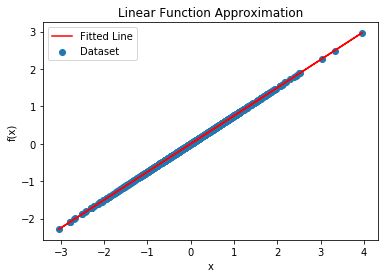

In [2]:
# Extract input values (x) and true output values (f(x))
x = data[:, 0]
fx = data[:, 1]

# Construct the design matrix
X = np.column_stack((x, np.ones_like(x)))

# Solve for the matrix A using least-squares minimization
A, _, _, _ = np.linalg.lstsq(X, fx, rcond=None)

# Extract the slope and intercept from the matrix A
slope = A[0]
intercept = A[1]

# Print the linear function approximation
print("Linear Function Approximation:")
print(f"f(x) = {slope} * x + {intercept}")

# Plot the dataset and the fitted line
plt.scatter(x, fx, label='Dataset')
plt.plot(x, slope * x + intercept, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Linear Function Approximation')
plt.legend()
plt.show()

## Part 2: approximate the function in dataset (B) with a linear function.

Linear Function Approximation:
f(x) = 0.02873497516022028 * x + 0.11114247433936228


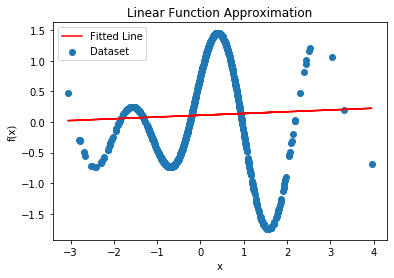

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Specify the relative file path to the dataset
file_path = '../data/nonlinear_function_data.txt'
# ../data
# Load the dataset
data = np.loadtxt(file_path)
# Extract input values (x) and true output values (f(x))
x = data[:, 0]
fx = data[:, 1]

# Construct the design matrix
X = np.column_stack((x, np.ones_like(x)))

# Solve for the matrix A using least-squares minimization
A, _, _, _ = np.linalg.lstsq(X, fx, rcond=None)

# Extract the slope and intercept from the matrix A
slope = A[0]
intercept = A[1]

# Print the linear function approximation
print("Linear Function Approximation:")
print(f"f(x) = {slope} * x + {intercept}")

# Plot the dataset and the fitted line
plt.scatter(x, fx, label='Dataset')
plt.plot(x, slope * x + intercept, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Linear Function Approximation')
plt.legend()
plt.show()

## Part 3: Approximate the function in dataset (B) with a combination of radial functions

In [5]:
from utils import *

In [6]:
nonlinear_data = "../data/nonlinear_function_data.txt"
points, targets = fetch_data(nonlinear_data)

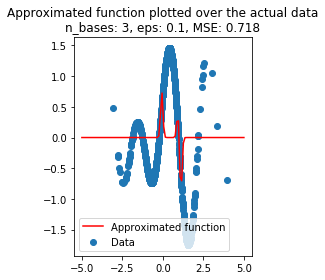

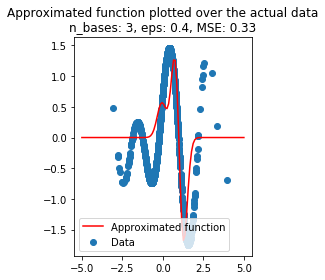

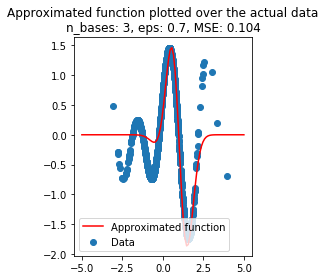

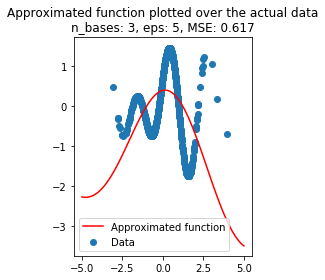

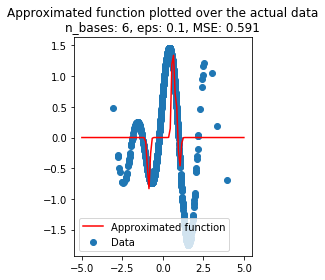

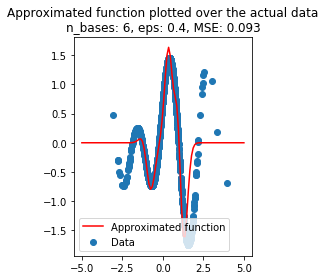

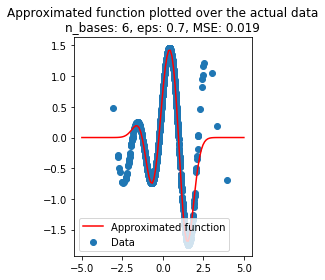

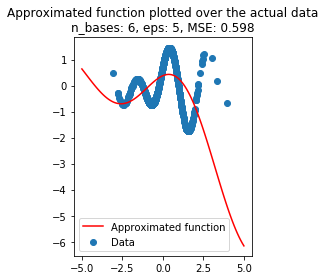

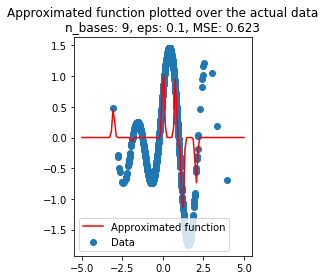

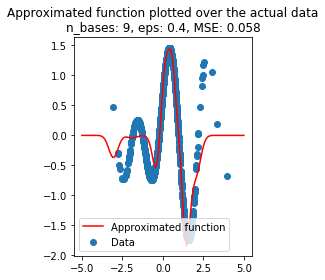

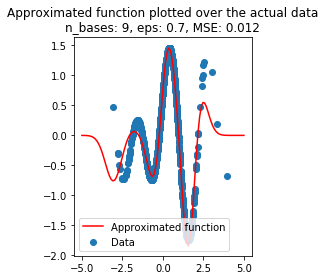

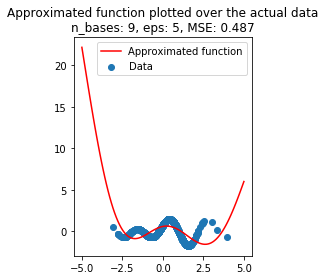

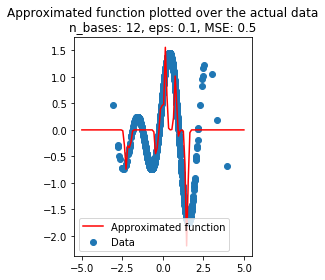

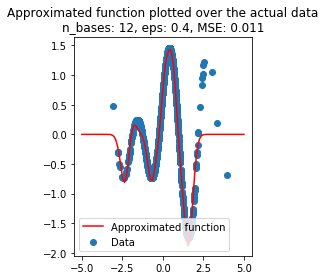

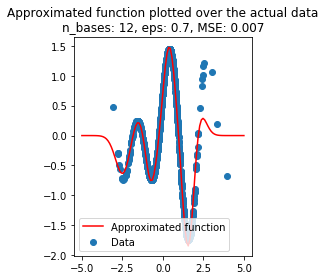

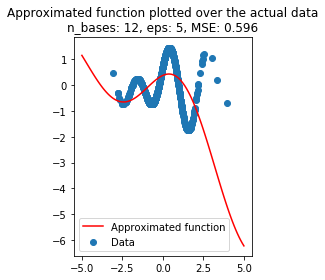

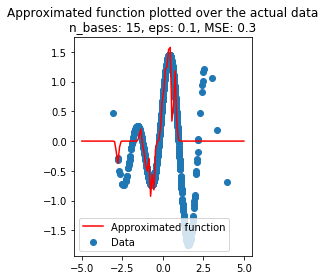

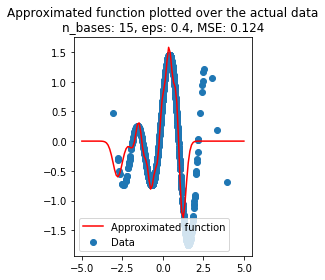

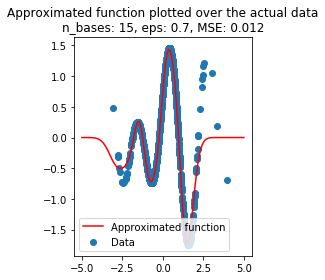

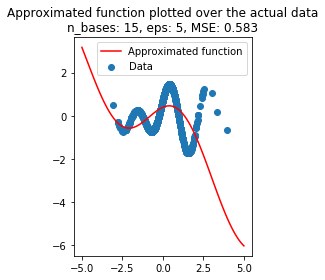

In [8]:
# try to approximate the data with different number of bases and values of eps, then plot the approximation and the data
n_bases_list = (3, 6, 9, 12, 15)
eps_list = (0.1, 0.4, 0.7, 5)
for n_bases in n_bases_list:
    # use the same center points with all the different values of eps
    centers = points[np.random.choice(range(points.shape[0]), replace=False, size=n_bases)]
    for eps in eps_list:
        # approximate the non-linear data with a combination of radial basis functions
        C, _, _, _, _, _, list_of_bases = nonlinear_least_squares(nonlinear_data, n_bases=n_bases, eps=eps, centers=centers)
        # compute the MSE of the approximation
        pred = y = np.sum(C * list_of_bases, axis=1)  # '*' indicates and elementwise product (dimensions broadcast to common shape)
        mse = np.linalg.norm(pred - targets)**2 / len(targets)
        # plot the approximated function over the actual data
        plot_approximation(lstsqr_sol=C, data=nonlinear_data, linear=False, centers=centers, eps=eps, MSE=round(mse, 3))

In [9]:
linear_data = "../data/linear_function_data.txt"
A, residuals, rank, singvals = linear_least_squares(linear_data)

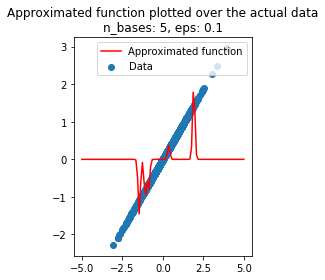

In [10]:
S, _, _, _, centers, eps, _ = nonlinear_least_squares(linear_data, n_bases=5, eps=0.1)
plot_approximation(lstsqr_sol=S, data=linear_data, linear=False, centers=centers, eps=eps)

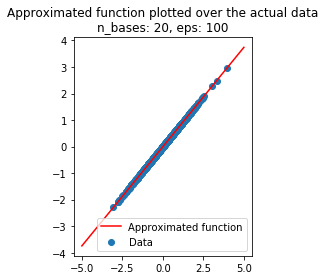

In [11]:
S, _, _, _, centers, eps, _ = nonlinear_least_squares(linear_data, n_bases=20, eps=100)
plot_approximation(lstsqr_sol=S, data=linear_data, linear=False, centers=centers, eps=eps)